#### Importing Libraries and Data

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 날씨 데이터 읽어오기
austin_weather = pd.read_csv('datasets/austin_weather.csv')

In [18]:
austin_weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### 날짜, 평균 기온(화씨), 평균 풍속(MPH)만 추출

In [19]:
# ['날짜', '평균 기온(화씨)', '평균 풍속(MPH)'] 만 추출하여 df 원본에 다시 저장
austin_weather = austin_weather[['Date', 'TempAvgF', 'WindAvgMPH']].head(30)
austin_weather

,Date,TempAvgF,WindAvgMPH
0,2013-12-21,60,4
1,2013-12-22,48,6
2,2013-12-23,45,3
3,2013-12-24,46,4
4,2013-12-25,50,2
5,2013-12-26,48,3
6,2013-12-27,53,1
7,2013-12-28,51,2
8,2013-12-29,50,5
9,2013-12-30,40,5


### 동일한 X 축에 (서로 다른 두 개 데이터를) 두 개 y 축으로 작성하는 차트

먼저 하나의 Y 축을 생성하고, twinx() 함수를 써서 X 축을 공유하는 다른 Y 축을 생성

No handles with labels found to put in legend.


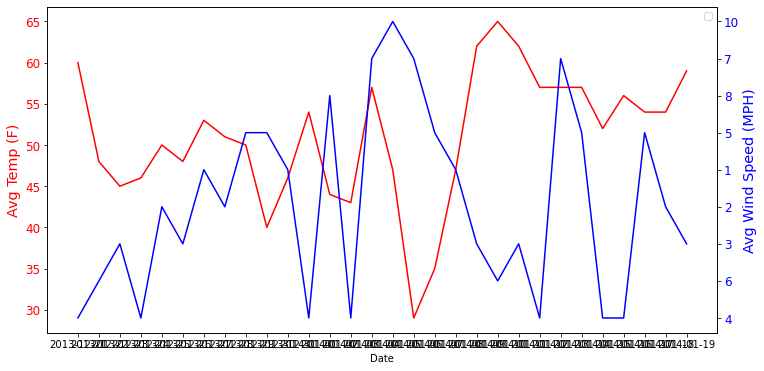

In [20]:
# 먼저 평균 기온을 위한 subplot 생성
fig, ax_tempF = plt.subplots()

# fig=plt.figure(figsize=(12,6)) 명령과 유사
fig.set_figwidth(12)
fig.set_figheight(6)

# 공유하는 x 축 제목을 지정
ax_tempF.set_xlabel('Date')

# x 축에 대하여, bottom=false 옵션으로 눈금선 제거, labelbottom=False 옵션으로 눈금 제목 제거
ax_tempF.tick_params(axis = 'x',
                    # bottom=False,
                    # labelbottom=False
                    )

# 평균 기온에 대한 왼쪽 y 축 제목을 빨강으로
ax_tempF.set_ylabel('Avg Temp (F)',
                    color='red',
                    size='x-large')

# 왼쪽 y 축 labelcolor 및 labelsize 지정
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# 왼쪽 y 축으로 평균 기온을 플롯
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

#ax_tempF.legend(0)

# twinx() 함수로 동일한 x 축을 공유하는 y 축 ax_precip 생성
ax_precip = ax_tempF.twinx()

# 평균 풍속에 대한 오른쪽 y 축 제목을 파랑으로
ax_precip.set_ylabel('Avg Wind Speed (MPH)',
                     color='blue', 
                     size='x-large') 

# 오른쪽 y 축 labelcolor 및 labelsize 지정
ax_precip.tick_params(axis='y',
                      labelcolor='blue',
                      labelsize='large')

# 오른쪽 y 축으로 평균 풍속을 처리
ax_precip.plot(austin_weather['Date'],
         austin_weather['WindAvgMPH'], 
         color='blue')

# ax_precip.legend(0)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax_tempF.transAxes)

plt.show()

### 동일한 x 축에 (동일한 데이터를) 두 개 y 축으로 작성하는 차트

동일한 데이터를 눈금만 다르게 표현할 경우에,
서로 다른 눈금을 두 개 y 축으로 작성

####  화씨 온도를 섭씨 온도로 변환하는 함수

In [21]:
def fahrenheit2celsius(f):
    return (f - 32)*5/9

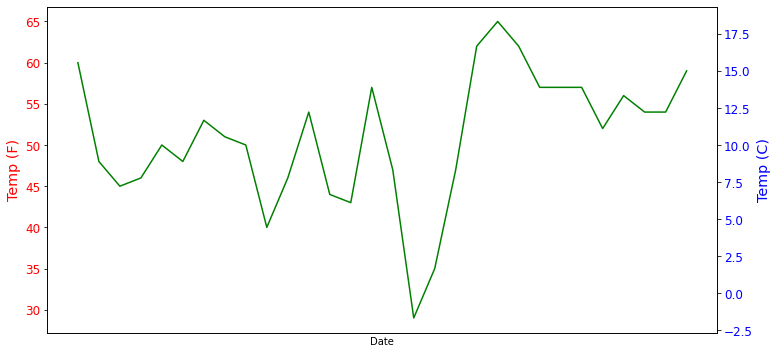

In [23]:
 # 화씨를 위한 subplot 생성
fig, ax_tempF = plt.subplots()

# fig = plt.figure(figsize=(12,6)) 명령과 유사함
fig.set_figwidth(12)
fig.set_figheight(6)

# 공유하는 X 축 레이블 정의
ax_tempF.set_xlabel('Date')

# bottom= false disables ticks and labelbottom disables x-axis labels
ax_tempF.tick_params(axis = 'x',
                    bottom=False,         # 눈금선 제거
                    labelbottom=False     # 눈금 레이블 제거
                    )

# 화씨 온도에 대한 왼쪽 y 축 레이블을 빨강으로
ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

# 왼쪽 y 축에 대한 눈금선 레이블 생상 및 크기 지정
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# 왼쪽 y 축에 화씨 온도 플롯
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

# twinx() 함수로 x 축을 공유하는 섭씨 온도에 대한 오른쪽 y 축 생성
ax_tempC = ax_tempF.twinx()

# get_ylim() 함수로 화씨 온도의 ymin 및 ymax 저장
ymin, ymax = ax_tempF.get_ylim()

# 섭씨 온도에 대한 ylim 설정
ax_tempC.set_ylim((fahrenheit2celsius(ymin),
                   fahrenheit2celsius(ymax)))

# 오른쪽 y 축 레이블을 파랑 화씨로 설정
ax_tempC.set_ylabel('Temp (C)', 
                    color='blue',
                    size='x-large')

# 오른쪽 y 축에 섭씨 기온 눈금을 설정
ax_tempC.tick_params(axis='y', 
                     labelcolor='blue', 
                     labelsize='large')

plt.show()